In [1]:
import pandas as pd
from signalai.config import CONFIG_DIR, PIPELINE_SAVE_PATH
from taskorganizer.pipeline import Pipeline

%load_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'svg'

In [2]:
config_path = CONFIG_DIR / "pipeline" / "processing.yaml"

data_config_path = CONFIG_DIR / "data_preparation" / "freq_splitter.yaml"
model_config_path = CONFIG_DIR / "models" / "freq_splitter" / "basic_inceptiontime.yaml"

pipeline = Pipeline(
    config_path,
    config_dir=CONFIG_DIR,
    save_folder=PIPELINE_SAVE_PATH,
    parameter_yamls=[data_config_path, model_config_path]
)

In [3]:
gen_gen = pipeline.run("gen_generator")
train_gen = gen_gen.get_generator("train", log=0, batch_size=16)

SHOWING GENERATOR
x.shape=(16, 1, 32734)
y.shape=(16, 2, 32734)


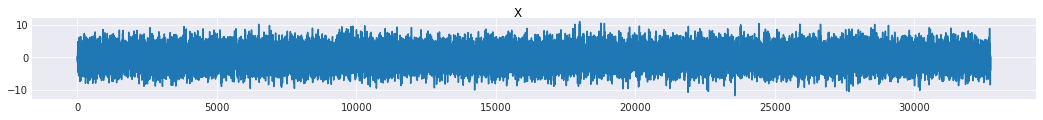

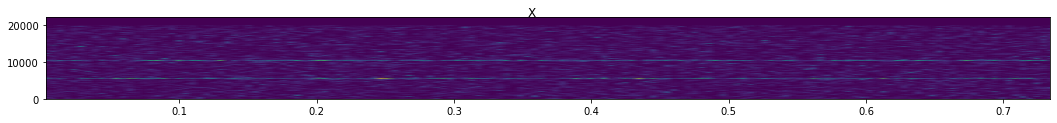

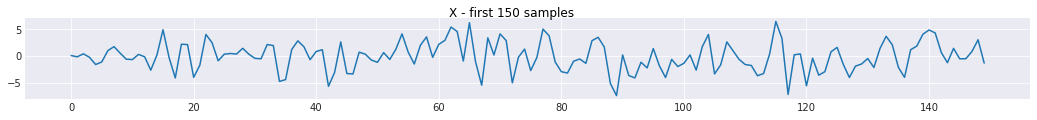

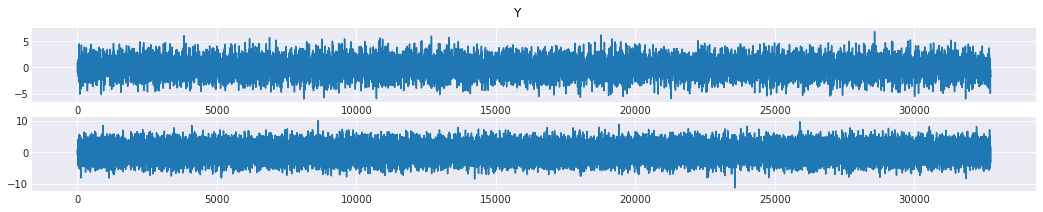

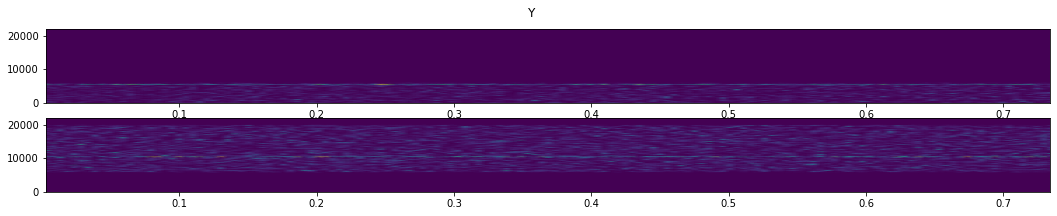

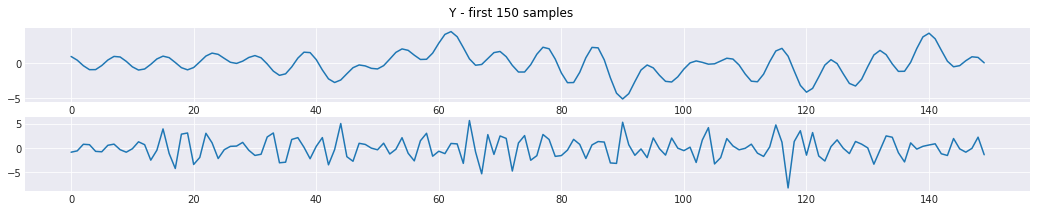

In [4]:
train_gen.test(44100)

In [5]:
pipeline.run("train_model")

'/mnt/DATA/Data/MyProjects/signalai/data/552937a9645e9731ef4bf72290eadae2'

In [6]:
signal_model = pipeline.run("trained_model")

In [7]:
signal_model

In [10]:
from signalai.signal.signal import Signal
from signalai.signal.fake_dataset import ToneGenerator
import numpy as np

fake_generator = ToneGenerator(44100, 16384*2, [1000, 16000], noise_ratio=5.)
a, _ = next(fake_generator)
b, _ = next(fake_generator)
c = (a + b) / 2

In [11]:
import audio2numpy as a2n
x,sr=a2n.audio_from_file("/home/martin/Music/Still D.R.E.mp3")
c = Signal(np.expand_dims(x[1000000:1300000, 0], 0))

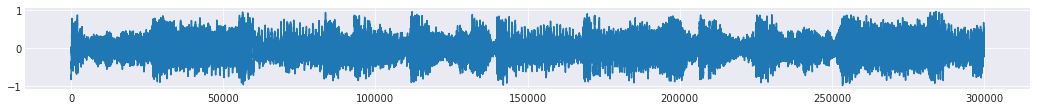

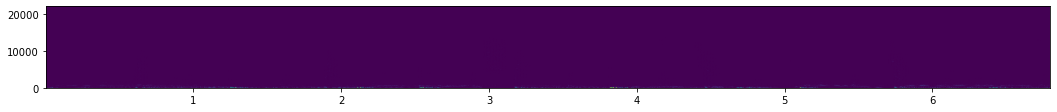

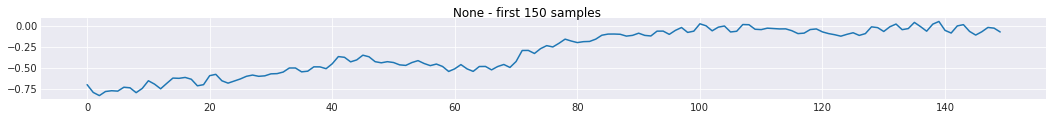

In [12]:
c.show_all(44100)

In [13]:

d = Signal(signal_model.eval_on_batch(np.expand_dims(c.signal, 0))[0].detach().cpu().numpy())

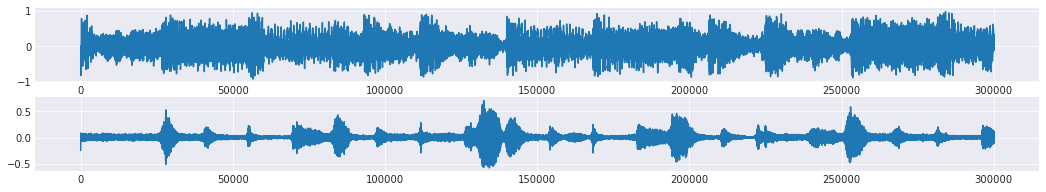

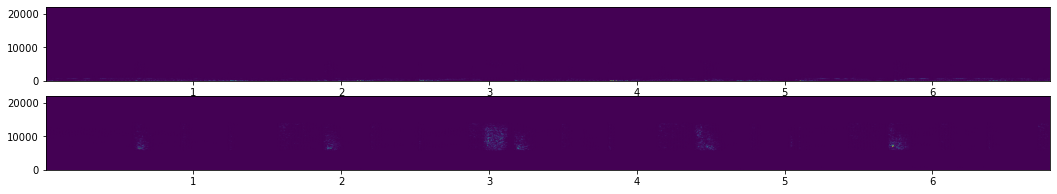

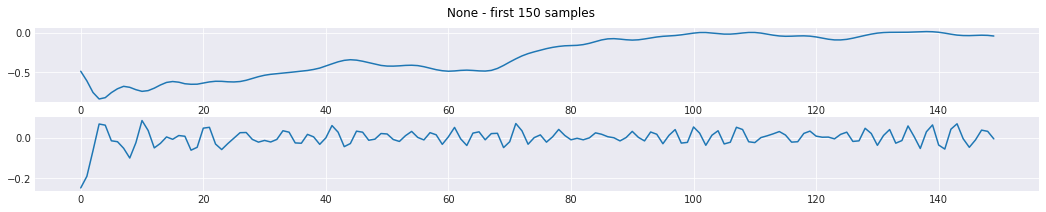

In [14]:
d.show_all(44100)

In [19]:
from signalai.signal.transformers import BandPassFilter
e = BandPassFilter(44100, low_cut=6000)(c)

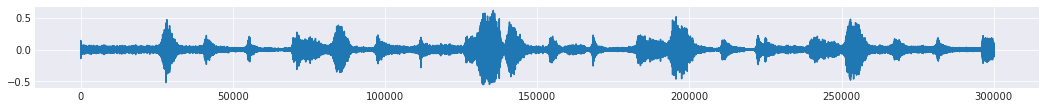

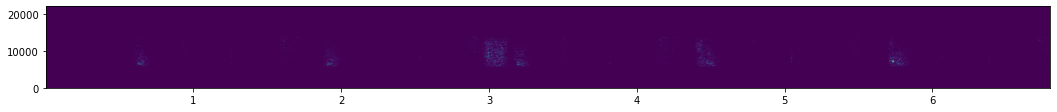

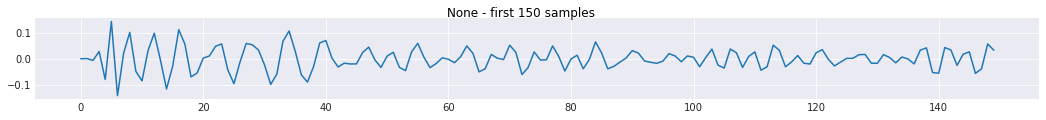

In [20]:
e.show_all(44100)

In [24]:
d.play(1)

In [23]:
e.play(0)